# Clustering Crypto

In [2]:
# Initial imports
import pandas as pd
!pip install hvplot 
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
!pip install -q holoviews 
import holoviews as hv
from holoviews import opts
hv.extension('matplotlib')


Output hidden; open in https://colab.research.google.com to view.

### Deliverable 1: Preprocessing the Data for PCA

In [45]:
# Load the crypto_data.csv dataset.

file_path = "https://raw.githubusercontent.com/Aleyvs/Cryptocurrencies/main/Resources/crypto_data.csv"
crypto_df = pd.read_csv(file_path, index_col=0)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [46]:
# Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [47]:
# Keep all the cryptocurrencies that have a working algorithm.
crypto_df['Algorithm'].isnull().sum()

0

In [48]:
crypto_df = crypto_df[crypto_df['Algorithm'].notnull()]
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [49]:
# Remove the "IsTrading" column. 
crypto_df = crypto_df.drop('IsTrading', axis=1)
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [50]:
# Remove rows that have at least 1 null value.
crypto_df = crypto_df.dropna()
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000


In [51]:
# Keep the rows where coins are mined.
crypto_df = crypto_df[crypto_df['TotalCoinsMined'] > 0]
crypto_df.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0


In [52]:
# Create a new DataFrame that holds only the cryptocurrencies names.
crypto_names_df = pd.DataFrame(crypto_df['CoinName'])
crypto_names_df.head()

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum


In [53]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
crypto_df = crypto_df.drop('CoinName', axis=1)
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0


In [54]:
# Use get_dummies() to create variables for text features.
X = pd.get_dummies(crypto_df, columns=['Algorithm','ProofType'])
X.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
# Standardize the data with StandardScaler().
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

### Deliverable 2: Reducing Data Dimensions Using PCA

In [56]:
# Using PCA to reduce dimension to three principal components.
pca = PCA(n_components=3)

crypto_pca = pca.fit_transform(X_scaled)
crypto_pca

array([[-0.33252638,  1.03264789, -0.5822251 ],
       [-0.31590334,  1.03302009, -0.58261159],
       [ 2.31096912,  1.65160831, -0.66183987],
       ...,
       [ 0.31358518, -2.2497809 ,  0.40487701],
       [-0.1761527 , -2.06699878,  0.49102179],
       [-0.29411746,  0.85357272, -0.2574901 ]])

In [57]:
# Create a DataFrame with the three principal components.
pca_df = pd.DataFrame(data=crypto_pca, columns=['PC 1','PC 2','PC 3'], index=X.index)
pca_df.head(10)

,PC 1,PC 2,PC 3
42,-0.332526,1.032648,-0.582225
404,-0.315903,1.033020,-0.582612
1337,2.310969,1.651608,-0.661840
BTC,-0.139768,-1.340886,0.180018
ETH,-0.150302,-2.070980,0.418209
LTC,-0.170096,-1.108352,-0.003938
DASH,-0.395395,1.238195,-0.562920
XMR,-0.144567,-2.252809,0.407061
ETC,-0.148750,-2.071052,0.418190
ZEC,-0.176152,-2.066999,0.491022


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

:Curve   [k]   (inertia)
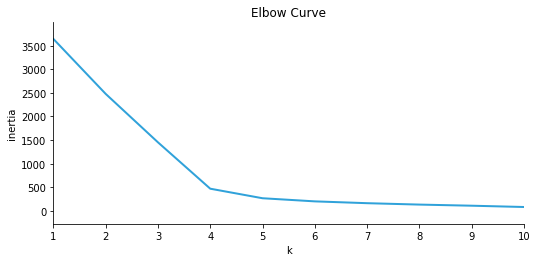

In [58]:
# Create an elbow curve to find the best value for K.
#intertia
inertia = []
k = list(range(1,11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_df)
    inertia.append(km.inertia_)

# elbow curve
elbow_data = {'k' : k, 'inertia' : inertia}
elbow_df = pd.DataFrame(elbow_data)
elbow_df.hvplot.line(x='k', y='inertia', title='Elbow Curve', xticks=k)

Running K-Means with `k=4`

In [59]:
# Initialize the K-Means model.
model = KMeans(n_clusters=4, random_state=1)

# Fit the model
model.fit(pca_df)

# Predict clusters
predictions = model.predict(pca_df)
predictions

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,

In [60]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
clustered_df = pd.concat([crypto_df,pca_df], axis= 1, join="inner")

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
clustered_df = pd.concat([clustered_df,crypto_names_df], axis= 1, join="inner")


#  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
clustered_df["Class"] = model.labels_

# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.332526,1.032648,-0.582225,42 Coin,1
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.315903,1.033020,-0.582612,404Coin,1
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.310969,1.651608,-0.661840,EliteCoin,1
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.139768,-1.340886,0.180018,Bitcoin,0
ETH,Ethash,PoW,1.076842e+08,0,-0.150302,-2.070980,0.418209,Ethereum,0
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.170096,-1.108352,-0.003938,Litecoin,0
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.395395,1.238195,-0.562920,Dash,1
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.144567,-2.252809,0.407061,Monero,0
ETC,Ethash,PoW,1.133597e+08,210000000,-0.148750,-2.071052,0.418190,Ethereum Classic,0
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.176152,-2.066999,0.491022,ZCash,0


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [61]:
# Creating a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x='PC 1',
    y='PC 2',
    z='PC 3',
    color='Class',
    symbol='Class',
    hover_name= 'CoinName',
    hover_data= ['Algorithm'],
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()


:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]
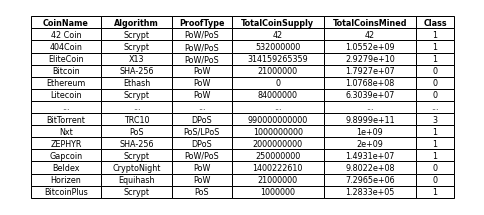

In [62]:
# Create a table with tradable cryptocurrencies.
clustered_df.hvplot.table(
    columns=['CoinName', 'Algorithm', 'ProofType','TotalCoinSupply','TotalCoinsMined', 'Class'],
    sortable=True, 
    selectable=True
)

In [63]:
# Print the total number of tradable cryptocurrencies.
print(f'There are {len(clustered_df)}  tradable cryptocurrencies.')

There are 532  tradable cryptocurrencies.


In [64]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
clustered_scaled = MinMaxScaler().fit_transform(clustered_df[['TotalCoinSupply', 'TotalCoinsMined']])
clustered_scaled

array([[4.20000000e-11, 0.00000000e+00],
       [5.32000000e-04, 1.06585544e-03],
       [3.14159265e-01, 2.95755135e-02],
       ...,
       [1.40022261e-03, 9.90135079e-04],
       [2.10000000e-05, 7.37028150e-06],
       [1.00000000e-06, 1.29582282e-07]])

In [65]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
plot_df = pd.DataFrame(
    data=clustered_scaled, columns=["TotalCoinSupply", "TotalCoinsMined"], index=clustered_df.index.copy()
)

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
plot_df['CoinName'] = clustered_df['CoinName']

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
plot_df['Class'] = clustered_df['Class']

plot_df.head(10)

,TotalCoinSupply,TotalCoinsMined,CoinName,Class
42,4.200000e-11,0.000000,42 Coin,1
404,5.320000e-04,0.001066,404Coin,1
1337,3.141593e-01,0.029576,EliteCoin,1
BTC,2.100000e-05,0.000018,Bitcoin,0
ETH,0.000000e+00,0.000109,Ethereum,0
LTC,8.400000e-05,0.000064,Litecoin,0
DASH,2.200000e-05,0.000009,Dash,1
XMR,0.000000e+00,0.000017,Monero,0
ETC,2.100000e-04,0.000115,Ethereum Classic,0
ZEC,2.100000e-05,0.000007,ZCash,0


:NdOverlay   [Class]
   :Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)
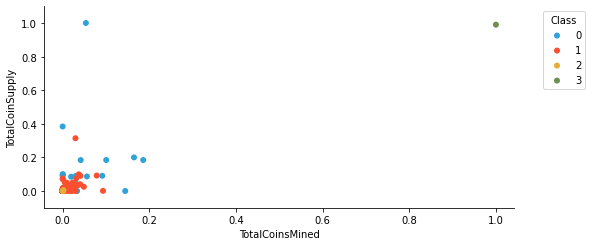

In [66]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
plot_df.hvplot.scatter(
    x="TotalCoinsMined", 
    y="TotalCoinSupply",
    by="Class",
    hover_cols="CoinName"
)
